In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
y= pd.read_csv("/home/christiane/Documents/Programming_Projects/snakemake_workflow/workflow/Output/Preprocessing/class.csv").iloc[:, 1].to_list()




X = np.load("/home/christiane/Documents/Programming_Projects/snakemake_workflow/workflow/Output/Preprocessing/train_matrix.npy")

In [26]:
np.shape(X)

(9743, 50, 50, 3)

In [2]:
import os
import pathlib
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import keras
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import losses


%matplotlib inline

2022-06-24 21:04:40.002112: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 21:04:40.002173: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
keras.__version__

'2.2.4'

In [36]:
#read files
path = r"//home/christiane/Documents/Programming_Projects/snakemake_workflow/static/Train/dataset"
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]

X_list = []
y = []

FileNotFoundError: [Errno 2] No such file or directory: '//home/christiane/Documents/Programming_Projects/snakemake_workflow/static/Train/dataset'

In [7]:
for pokemon in list_subfolders_with_paths:
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(pokemon) if isfile(join(pokemon, f)) and '.jpg' in f or '.jpeg'in f]    

In [15]:
pokemon.split(os.sep)[-1]

'Pikachu'

In [38]:
#read files
path = r"/home/christiane/Documents/Programming_Projects/snakemake_workflow/workflow/static/Train/dataset"

list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]

X_list = []
y = []

for pokemon in list_subfolders_with_paths:
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(pokemon) if isfile(join(pokemon, f)) and '.jpg' in f or '.jpeg'in f]    
    for img in onlyfiles:
        n = Image.open("%s/%s"%(pokemon,img))

        #drop if only 2 dim!
        if len(np.shape(n))!=3 or np.shape(n)[2] != 3:
            pass
        else:
            #reshape
            n = n.resize((50, 50))
            n = np.asarray(n).astype(np.float32)/255.
            X_list.append(n)
            y.append(pokemon.split(os.sep)[-1])
        
      
    
X = np.concatenate( X_list, axis=0 )
X = X.reshape(-1,50,50,3)
np.shape(X)

np.shape

<function numpy.shape(a)>

In [21]:
np.save("train_matrix", X)

In [4]:
#train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
y_cat = pd.get_dummies(y)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.1, random_state=42)



In [10]:
y_cat = pd.read_csv("/home/christiane/Documents/Programming_Projects/snakemake_workflow/workflow/Output/Train_Test_Set/y_train.csv")



SyntaxError: invalid syntax (3484450341.py, line 2)

In [18]:
y_train = y_cat.drop(columns=['Unnamed: 0'])

In [16]:
y_cat.columns[0:3]

Index(['Unnamed: 0', 'Abra', 'Aerodactyl'], dtype='object')

In [41]:
print('Train data ',np.shape(X_train))
print('Test data ',np.shape(X_val))

Train data  (8768, 50, 50, 3)
Test data  (975, 50, 50, 3)


149


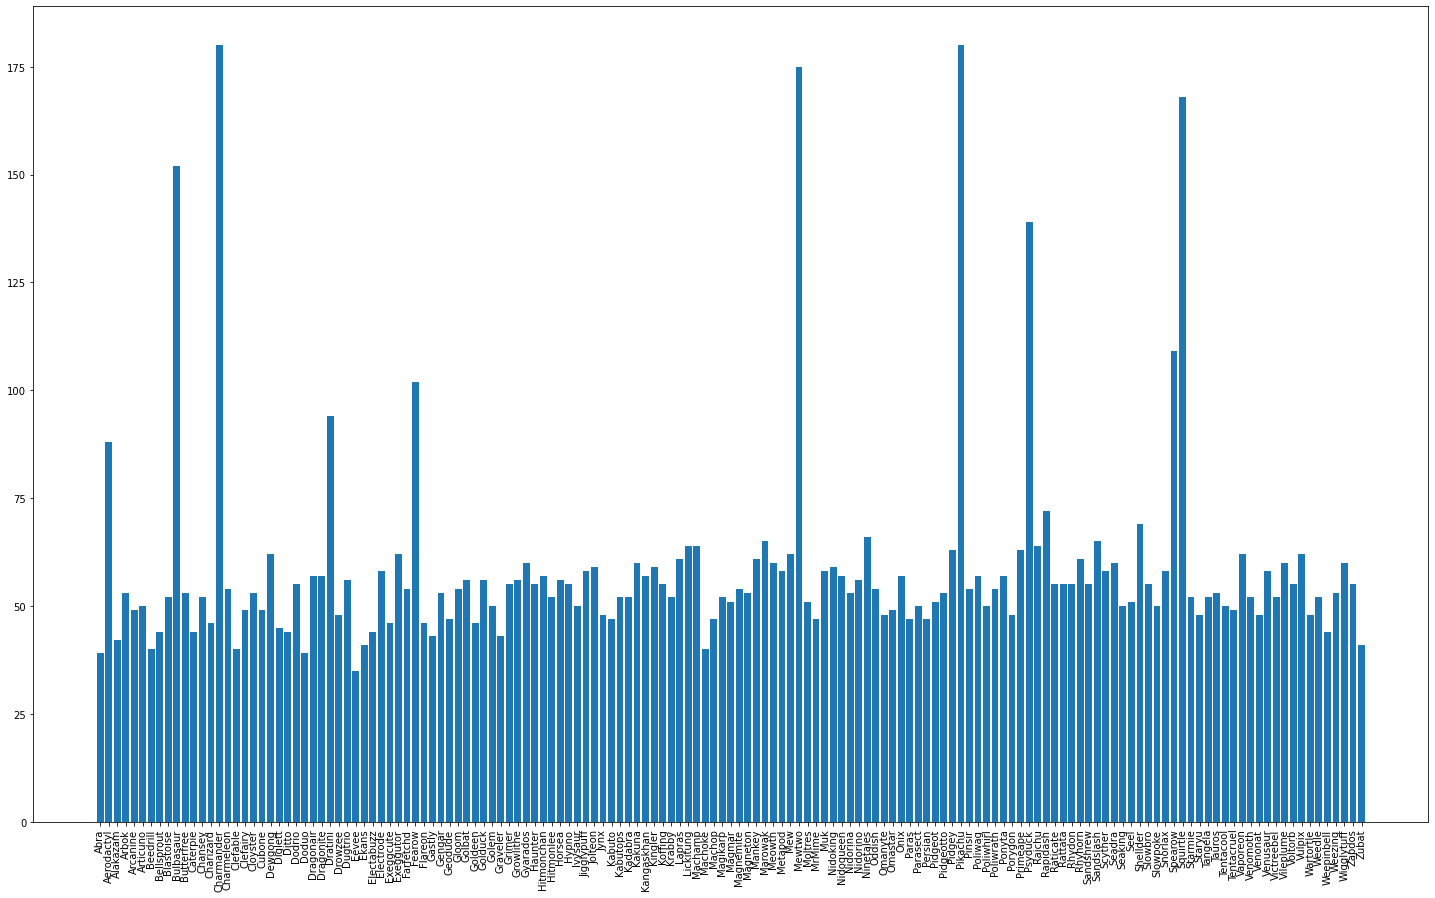

In [19]:
print(len(y_train.columns))
plt.figure(figsize=(25,15))
plt.bar(y_train.columns, y_train.sum())
plt.xticks(rotation=90)
plt.show()

In [58]:
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import losses


height = 50
width = 50
channel = 3

#reshaping samples according to sample size
X_train = X_train.reshape(-1,width,height, channel)
X_val = X_val.reshape(-1,width,height, channel)

# Best CNN parameter

# The parameters and construction were chosen after 
# testing and optimizing different initial settings 


#define hyperparameters
epochs = 50
batch_size = 256


#define optimizer
#rmsprop = RMSprop(learning_rate=0.001, rho=0.9)


# construct model
model = Sequential()

# Layers
model.add(Convolution2D(32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(width,
                              height,
                              channel)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(298, activation="relu"))
model.add(Dense(149,activation="softmax"))

# compiling
model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 128)        

In [23]:
pkmn_model = model.fit(X_train, y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  verbose = 1)

Epoch 1/50
35/35 [==============================] - 11s 302ms/step - loss: 4.8337 - accuracy: 0.0420
Epoch 2/50
35/35 [==============================] - 11s 308ms/step - loss: 4.3716 - accuracy: 0.0874
Epoch 3/50
35/35 [==============================] - 11s 329ms/step - loss: 3.8713 - accuracy: 0.1447
Epoch 4/50
35/35 [==============================] - 13s 358ms/step - loss: 3.4742 - accuracy: 0.2119
Epoch 5/50
35/35 [==============================] - 13s 370ms/step - loss: 3.1368 - accuracy: 0.2698
Epoch 6/50
35/35 [==============================] - 13s 365ms/step - loss: 2.7831 - accuracy: 0.3498
Epoch 7/50
35/35 [==============================] - 13s 373ms/step - loss: 2.4732 - accuracy: 0.4091
Epoch 8/50
35/35 [==============================] - 13s 385ms/step - loss: 2.1865 - accuracy: 0.4668
Epoch 9/50
35/35 [==============================] - 13s 383ms/step - loss: 1.9610 - accuracy: 0.5146
Epoch 10/50
35/35 [==============================] - 14s 399ms/step - loss: 1.6148 - accura

In [36]:
model_history = model.fit(X_train, y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  verbose = 1,
                  validation_data = (X_val, y_val),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
35/35 [==============================] - 11s 320ms/step - loss: 0.1014 - accuracy: 0.9729 - val_loss: 5.5095 - val_accuracy: 0.3374
Epoch 2/50
35/35 [==============================] - 11s 302ms/step - loss: 0.0986 - accuracy: 0.9739 - val_loss: 5.4405 - val_accuracy: 0.3426
Epoch 3/50
35/35 [==============================] - 12s 330ms/step - loss: 0.0988 - accuracy: 0.9742 - val_loss: 5.3395 - val_accuracy: 0.3487
Epoch 4/50
35/35 [==============================] - 13s 380ms/step - loss: 0.0930 - accuracy: 0.9746 - val_loss: 5.2857 - val_accuracy: 0.3426
Epoch 5/50
35/35 [==============================] - 13s 382ms/step - loss: 0.0981 - accuracy: 0.9751 - val_loss: 5.5099 - val_accuracy: 0.3262
Epoch 6/50
35/35 [==============================] - 13s 370ms/step - loss: 0.1061 - accuracy: 0.9726 - val_loss: 5.2400 - val_accuracy: 0.3374
Epoch 7/50
35/35 [==============================] - 13s 385ms/step - loss: 0.1047 - accuracy: 0.9697 - val_loss: 5.3731 - val_accuracy: 0.3354

In [57]:
model_history.summary

AttributeError: 'History' object has no attribute 'summary'

In [54]:
a = "CNN_{optimizer}_{22}_{batchsize}"

aa = a.split("_{")


int(aa[2][0:2])

22

In [48]:
optimizer = a[a.find("{")+1:a.find("}")]
epochs = a[a.find("{")+1:a.find("}")]
epochs

'ptimizer'

In [37]:
model.save("model_hist")

INFO:tensorflow:Assets written to: model_hist/assets


INFO:tensorflow:Assets written to: model_hist/assets


In [40]:
import tensorflow as tf
new_model = tf.keras.models.load_model('model')

new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 9, 9, 128)         0

In [34]:
pkmn_model.summary()

AttributeError: 'History' object has no attribute 'summary'

Expected classification accuracy: 0.336


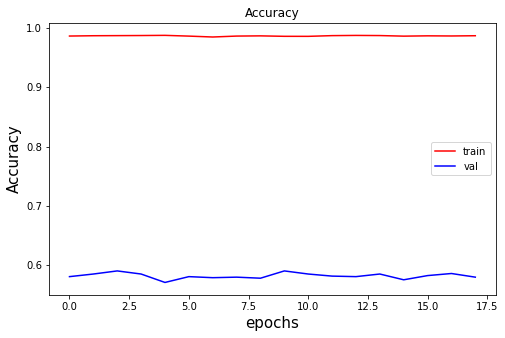

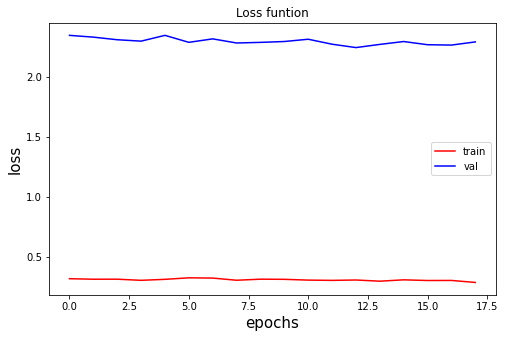

In [61]:
print('Expected classification accuracy: %.3f'%model_history.history['val_accuracy'][-1])

# Plot the accuracy
plt.figure(figsize=(8,5))
plt.title('Accuracy')
plt.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
plt.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()
plt.show()

         
# Plot the loss function
plt.figure(figsize=(8,5))
plt.title('Loss funtion')
plt.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
plt.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.legend()
plt.show()


In [43]:
hist_df = pd.DataFrame(model_history.history) 

hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.101365,0.972856,5.509477,0.337436
1,0.098628,0.973882,5.440542,0.342564
2,0.098798,0.974224,5.339485,0.348718
3,0.092956,0.974567,5.285745,0.342564
4,0.098059,0.975137,5.509927,0.326154


1/1 [==============================] - 0s 55ms/step
this is a Eevee


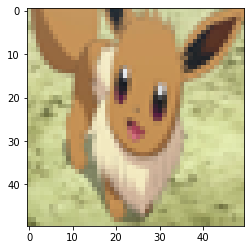

In [41]:
# new instance where we do not know the answer
n = Image.open("/home/christiane/Documents/Programming_Projects/snakemake_workflow/workflow/static/predict/Evoli.jpg")
n = n.resize((50, 50))
X_new = np.asarray(n).astype(np.float32)/255.
X_new = X_new.reshape(1,50,50,3)
#y_new = model.predict_classes(X_new)

predict_x=new_model.predict(X_new) 
y_new=np.argmax(predict_x,axis=1)


# show the inputs and predicted outputs
print('this is a %s'%(y_train.columns[y_new[0]]))
plt.imshow(X_new[0])
plt.show()


In [17]:
import innvestigate
import innvestigate.utils


# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
#analyzer = innvestigate.create_analyzer("deep_taylor", model)


In [20]:
analyzer = innvestigate.create_analyzer("gradient", model)

In [21]:
analysis = analyzer.analyze(inputs)

NameError: name 'inputs' is not defined

In [26]:
keras.version

NameError: name 'keras' is not defined

In [22]:
import innvestigate
import innvestigate.utils


# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)


Exception: No softmax found.

In [12]:
model.save('pokedex_model')

In [17]:
import innvestigate
import innvestigate.utils as iutils

# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

Exception: No softmax found.

In [143]:
model

In [ ]:
import innvestigate
import innvestigate.utils as iutils
#https://github.com/albermax/innvestigate/blob/master/examples/notebooks/introduction.ipynb
# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input
# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

# Add batch axis and preprocess
x = preprocess(image[None])
# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))
# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))